<span>
<b>Author:</b> <a href="http://about.giuliorossetti.net">Giulio Rossetti</a>, Andrea Failla<br/>
<b>Python version:</b>  >=3.7<br/>
<b>Networkx version:</b>  >=2.3<br/>
<b>Last update:</b> 14/04/2024
</span>

<a id='top'></a>
# *Network Analysis in Python*

``Networkx`` è una libreria python progettata per supportare l'analisi di reti complesse.

In questo notebook vengono presentate alcune delle caratteristiche principali della libreria e una panoramica delle sue funzionalità.

La documentazione completa è disponibile sul [sito](https://networkx.github.io/documentation/latest/) del progetto.

## Importing the library
Per prima cosa importiamo la libreria``networkx`` e diamogli alias ``nx``.

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

Oltre ad analizzare le reti, le visualizzeremo. per questo importiamo anche ``matplotlib``.

In [2]:
%matplotlib inline 

## Il nostro primo grafo

``networkx`` offre vari tipi di grafo

Tra questi
- grafi non direzionati, disponibili tramite la classe ``Graph``
- grafi non direzionati, disponibili tramite la classe ``DiGraph``


Possiamo creare e modificare un grafo in questo modo:

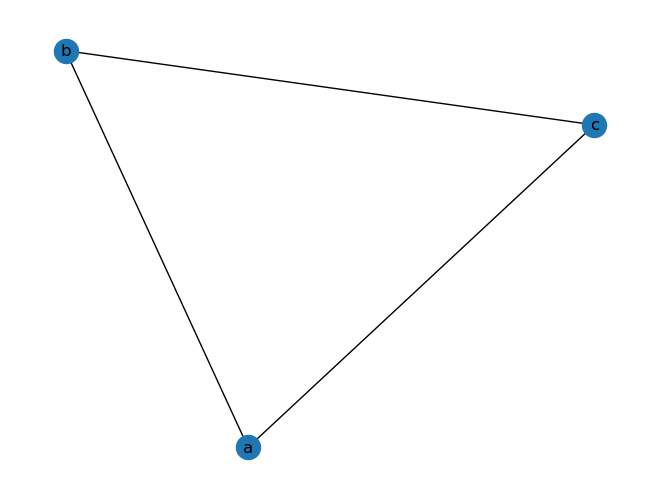

In [3]:
g = nx.Graph() # nx.DiGraph()

g.add_node("a")
g.add_edge("a", "b")
g.add_edge("a", "c")
g.add_edge("b", "c")

nx.draw(g ,with_labels=True)

Eliminare nodi e archi:

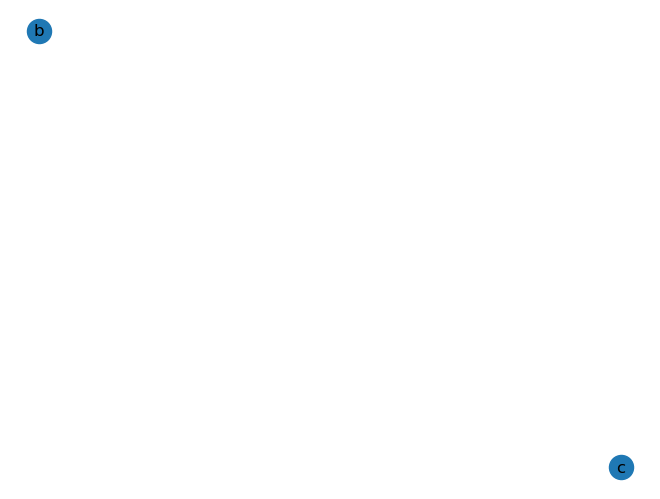

In [4]:
g.remove_node("a")
g.remove_edge("b", "c")

#re-draw the graph
nx.draw(g, with_labels=True)

## Leggere un grafo da file
``networkx`` supporta vari formati di grafo. 

Tra questi, uno dei più utilizzati nei repository online è il formato *edgelist* (cioè, elenco di archi).
Per oggi utilizzeremo il formato gexf che avete giàò visto.

In [5]:
g = nx.read_gexf('i-like-trains.gexf')

Allo stesso modo, un grafo può essere scritto su un file usando ``nx.write_gexf(g, filename)``.

Per tutti i metodi di I/O consultare la [documentazione ufficiale](https://networkx.github.io/documentation/latest/reference/readwrite/index.html)

## Accedere a nodi e archi
Dato un oggetto ``Graph``  è possibile iterare sui suoi nodi con un for

In [6]:
for n in g.nodes():
    # do something
    pass

Allo stesso modo sugli archi

In [7]:
for e in g.edges():
    # do something
    pass

## Statistiche di base
``networkx`` permette di manipolare i nodi e gli archi, di contarli e di estrarre le caratteristiche globali rilevanti.

In [8]:
g.number_of_nodes()

733

In [9]:
g.number_of_edges()

1006

In [10]:
g.is_directed()

False

## Grado e degree distribution
Il grado di un nodo può essere ottenuto come segue:

In [11]:
g.degree('Battipaglia') 

3

calcolare il grado medio in un grafo:

In [12]:
sum(dict(g.degree()).values())/float(len(g))

2.7448840381991815

Visualizzare la degree distribution

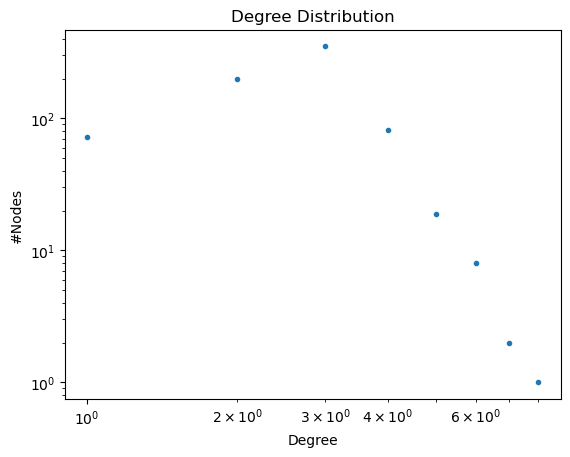

In [13]:
hist = nx.degree_histogram(g)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()

## Componenti
``networkx`` consente di selezionare viste specifiche dei nodi del grafo originale


In [14]:
list(g.neighbors('Battipaglia')) # obtain the list of neighobors for node 0

['Sapri', 'Salerno', 'Sicignano D.A.']

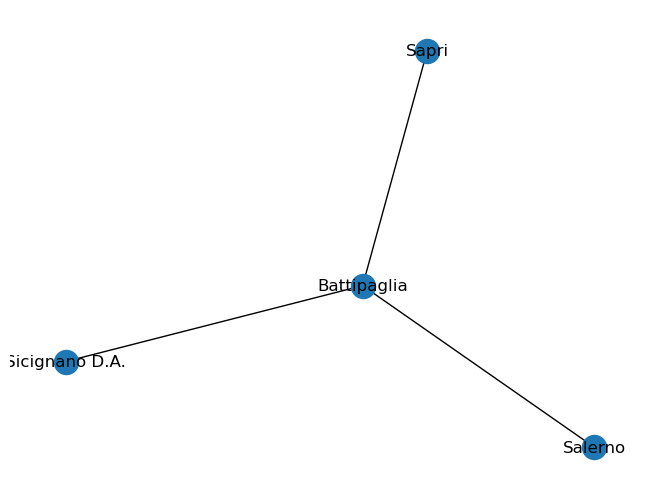

In [15]:
ego = nx.ego_graph(g, 'Battipaglia') # ego network of the node 
nx.draw(ego, with_labels=True)

Using the same rationale also connected components can be extracted

In [16]:
nx.number_connected_components(g)

3

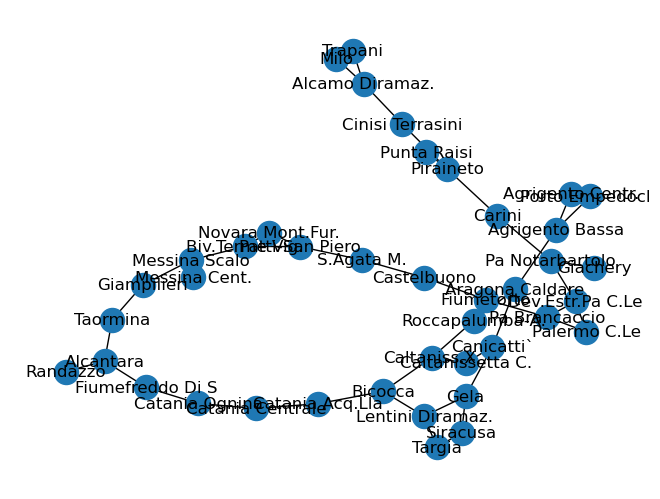

In [17]:
comps = list(nx.connected_components(g)) # get a list of connected components (for decreasing size)
comp_1 = nx.subgraph(g, comps[1]) # build a subgraph on the second component
nx.draw(comp_1, with_labels=True)

## Paths and Diameter
Shortest paths can be extracted as well using the following syntax

In [18]:
nx.shortest_path(g, source='Agrigento Centr.', target='Catania Centrale')

['Agrigento Centr.',
 'Agrigento Bassa',
 'Aragona Caldare',
 'Roccapalumba-A.',
 'Caltaniss.X.',
 'Bicocca',
 'Catania Acq.Lla',
 'Catania Centrale']

In [19]:
nx.shortest_path_length(g, source='Agrigento Centr.', target='Catania Centrale')

7

Moreover, the network diameter can be computed as follows

In [20]:
nx.diameter(g.subgraph(comps[0])) # we compute the diameter on the giant component

52

## Triangles, density and clustering
Other indexes that can be computed using the library are 

In [21]:
nx.density(g)

0.003749841582239319

In [22]:
nx.triangles(g)['Milano Centrale']

4

In [23]:
nx.clustering(g)['Milano Centrale']

0.6666666666666666

In [24]:
nx.average_clustering(g) # compute the global clustering coefficient

0.11574416942766179